In [1]:
# KNN Classification
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
animal_df=pd.read_csv("Zoo.csv")
#!pip install bioinfokit 

In [3]:
animal_df.head(20)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
animal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
animal_df[animal_df.duplicated()] # Prints the duplicated rows

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [6]:
animal_df["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot:>

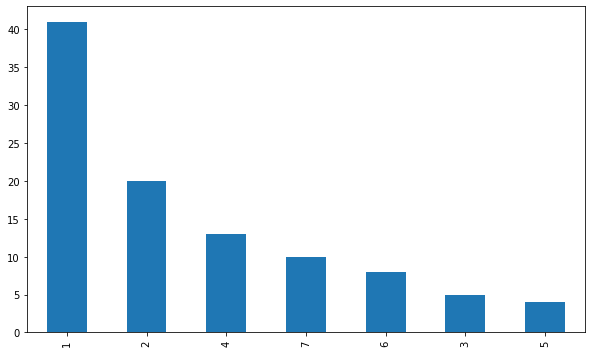

In [7]:
plt.figure(figsize=(10,6))
animal_df["type"].value_counts().plot(kind="bar")

In [8]:
animal_dataframe=pd.read_csv('Zoo.csv',index_col='animal name') # to make animal name as the index

In [9]:
filename = 'Zoo.csv'
names = [
    'hair' 'feathers' 'eggs' 'milk' 'airborne' 'aquatic' 'predator' 'toothed' 'backbone' 'breathes' 'venomous' 'fins' 'legs' 'tail' 'domestic' 'catsize' 'type'
]

array = animal_dataframe.values
X = array[:, 0:-1]
Y = array[:, -1]

In [10]:
animal_dataframe

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

In [13]:
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [14]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=5)

In [15]:
results.mean()

0.8614285714285714

## Grid Search

In [16]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.model_selection import GridSearchCV

In [17]:
filename = 'Zoo.csv'
names = [
    'hair' 'feathers' 'eggs' 'milk' 'airborne' 'aquatic' 'predator' 'toothed' 'backbone' 'breathes' 'venomous' 'fins' 'legs' 'tail' 'domestic' 'catsize' 'type'
]

array = animal_dataframe.values
X = array[:, 0:-1]
Y = array[:, -1]

In [18]:
n_neighbors = numpy.array([2*i+1 for i in range(0,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [19]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [20]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [21]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X, Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [22]:
animal_dataframe

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 1}


## Visualizing the CV results

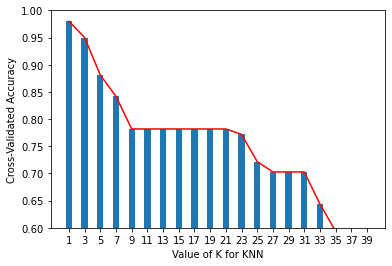

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

In [25]:
#TSNE visualization
from bioinfokit.visuz import cluster
from sklearn.manifold import TSNE
data_tsne = TSNE(n_components=2).fit_transform(X)
cluster.tsneplot(score=data_tsne)

In [26]:
# get a list of categories
color_class = animal_dataframe['type'].to_numpy()
cluster.tsneplot(score=data_tsne, colorlist=color_class, legendpos='upper right',legendanchor=(1.15, 1))
#Plot will be stored in the default directory

## So from the above analysis we can conclude that the best value of k is 1 as it gives the accuracy of 98%